In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import expm
import scipy
from matplotlib import animation, rc, pyplot as plt
from numpy import genfromtxt

In [2]:
#load the saved data for further use:
t_list = genfromtxt('pyrazine t_list.csv', delimiter=',')
psi_list = np.load('pyrazine psi_list.npz', allow_pickle=True)
nor_list = genfromtxt('pyrazine nor_list.csv', delimiter=',', dtype=np.complex128)
auto_list = genfromtxt('pyrazine auto_list.csv', delimiter=',', dtype=np.complex128)
oneprob_list = genfromtxt('pyrazine oneprob_list.csv', delimiter=',', dtype=np.complex128)
twoprob_list = genfromtxt('pyrazine twoprob_list.csv', delimiter=',', dtype=np.complex128)

In [3]:
#time axis
timearray = np.array(t_list)*0.6582119  # hbar = 0.6582119 (eV fs)

Text(0, 0.5, 'Prabability Density')

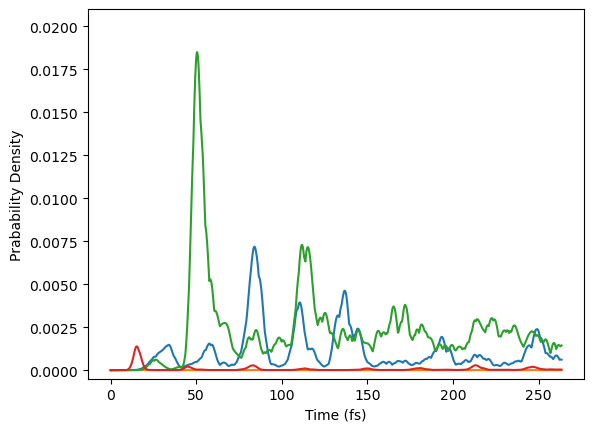

In [4]:
#psi_list-related figure
#Maximum values of the probability density at the boundaries for four modes
max_values_10a = []
max_values_9a = []
max_values_1 = []
max_values_6a = []
list_of_arrays = psi_list['arr_0']
for array in list_of_arrays:
    edge_slice10a_0 = array[:,:,:,:,0]  
    edge_slice9a_0 = array[:,:,:,0,:] 
    edge_slice1_0 = array[:,:,0,:,:] 
    edge_slice6a_0 = array[:,0,:,:,:] 
    mod_squared_10a_0 = np.abs(edge_slice10a_0) ** 2 
    mod_squared_9a_0 = np.abs(edge_slice9a_0) ** 2 
    mod_squared_1_0 = np.abs(edge_slice1_0) ** 2 
    mod_squared_6a_0 = np.abs(edge_slice6a_0) ** 2 

    edge_slice10a_1 = array[:,:,:,:,-1]  
    edge_slice9a_1 = array[:,:,:,-1,:] 
    edge_slice1_1 = array[:,:,-1,:,:] 
    edge_slice6a_1 = array[:,-1,:,:,:] 
    mod_squared_10a_1 = np.abs(edge_slice10a_1) ** 2 
    mod_squared_9a_1 = np.abs(edge_slice9a_1) ** 2 
    mod_squared_1_1 = np.abs(edge_slice1_1) ** 2 
    mod_squared_6a_1 = np.abs(edge_slice6a_1) ** 2 
    
    max_value_10a_0 = np.max(mod_squared_10a_0)
    max_value_10a_1 = np.max(mod_squared_10a_1)
    max_value_10a = np.max([max_value_10a_0, max_value_10a_1])
    max_values_10a.append(max_value_10a)  #10a mode
    
    max_value_9a_0 = np.max(mod_squared_9a_0)
    max_value_9a_1 = np.max(mod_squared_9a_1)
    max_value_9a = np.max([np.max(mod_squared_9a_0), np.max(mod_squared_9a_1)])
    max_values_9a.append(max_value_9a)  #9a mode
    
    max_value_1_0 = np.max(mod_squared_1_0)
    max_value_1_1 = np.max(mod_squared_1_1)
    max_value_1 = np.max([np.max(mod_squared_1_0), np.max(mod_squared_1_1)])
    max_values_1.append(max_value_1)  #1 mode

    max_value_6a_0 = np.max(mod_squared_6a_0)
    max_value_6a_1 = np.max(mod_squared_6a_1)
    max_value_6a = np.max([np.max(mod_squared_6a_0), np.max(mod_squared_6a_1)])
    max_values_6a.append(max_value_6a)  #6a mode

plt.plot(timearray,max_values_10a)
plt.plot(timearray,max_values_9a)
plt.plot(timearray,max_values_1)
plt.plot(timearray,max_values_6a)

plt.ylim(-0.0005, 0.021)
plt.xlabel('Time (fs)')
plt.ylabel('Prabability Density')

(0.9, 1.1)

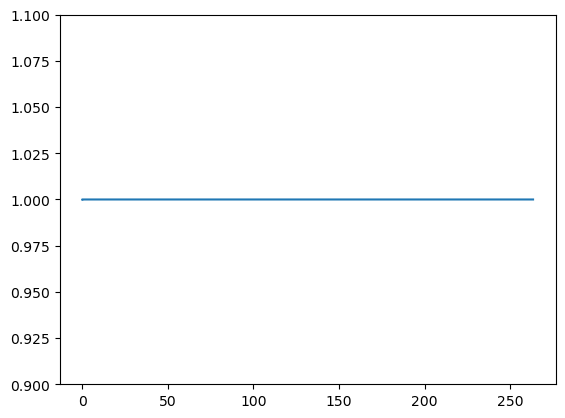

In [5]:
#nor_list-related figure
#norm preservation check during time evolution
line, = plt.plot(timearray,np.real(nor_list))
plt.ylim(0.9,1.1)

Text(0.5, 0, 'Time (fs)')

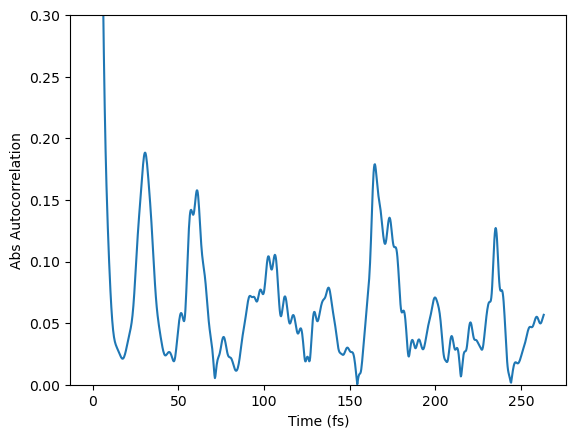

In [6]:
#auto_list-related figure
#absolute value of autocorrelation
line, = plt.plot(timearray,np.abs(auto_list))
plt.ylim(0,0.3)
plt.ylabel('Abs Autocorrelation')
plt.xlabel('Time (fs)')

Text(0.5, 0, 'Energy (eV)')

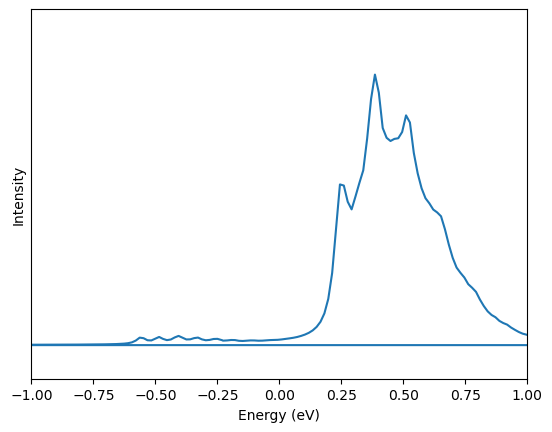

In [7]:
#auto_list-related figure
#absorption spectrum figure
ZPE = np.load('pyrazine zero point energy.npy')

restime = len(t_list)
dtime  = t_list[2]-t_list[1]
denergy  = 2 * np.pi / (restime * dtime)
energyaxis = np.concatenate((np.arange(0, restime/ 2-1),
                        np.arange(-restime/ 2, 0))) * denergy
ZeroPointEnergy = np.real(ZPE)
energyaxisshifted = energyaxis - ZeroPointEnergy

autoarray = np.array(auto_list)
autoarray *= np.exp(-timearray/30) #broadening function
autofft  = np.fft.ifft(autoarray)
autofft *= 40 #adjustable scaling factor 

line, = plt.plot(energyaxisshifted, np.abs(np.real(autofft))-np.min(np.abs(np.real(autofft))))
plt.ylim(-0.1,1)
plt.yticks([])
plt.xlim(-1,1)
plt.ylabel('Intensity')
plt.xlabel('Energy (eV)')

Text(0.5, 0, 'Time (fs)')

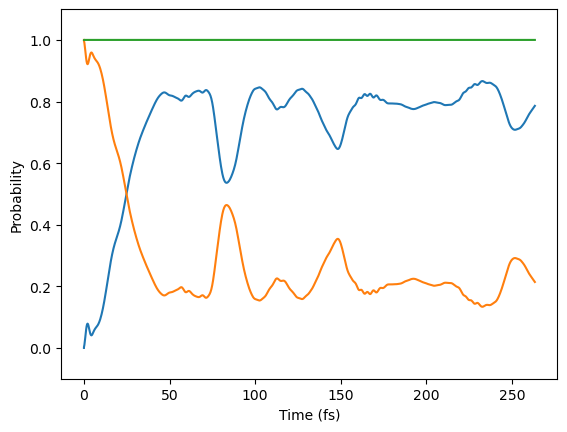

In [8]:
#oneprob_list, twoprob_list-related figure
#probability of S1 and S2 states plotting
sums1s2 = np.array(oneprob_list)+np.array(twoprob_list)
sumlist = sums1s2.tolist()

line, = plt.plot(timearray, np.real(oneprob_list))
line1, = plt.plot(timearray, np.real(twoprob_list))
line2, = plt.plot(timearray, np.real(sumlist))

plt.ylim(-0.1,1.1)
plt.ylabel('Probability')
plt.xlabel('Time (fs)')